In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# 7. 고윳값 계산 알고리즘

## 1) 야코비 회전법

### (1) 개요
#### - 야코비 회전행렬을 누적해서 곱해 행렬을 대각행렬로 수렴하게하는 알고리즘이다.
#### - 단, 이때 알고리즘의 대상 행렬은 n * n의 실대칭행렬이어야 한다.

### (2) 야코비 회전행렬의 특성

#### - 야코비 회전행렬의 모양

- 대각성분은 1과 삼각함수이다.
- 지정된 숫자에 해당하는 행과 열의 교차 성분에 삼각함수가 들어간다.
- ex) R(2,4,k)인 야코비 회전행렬이라면, 이 행렬의 (2,2), (2,4), (4,2), (4,4) 성분에 삼각함수가 들어간다.
- 각 교차 성분에 들어가는 삼각함수는, 시계 반대방향으로 Cos -> Sin -> Cos -> (-sin)이다. (코 -> 싸 -> 코 -> 마싸)

In [3]:
# R(1,2,k)의 야코비 회전행렬은 다음과 같다.

print(np.matrix([["cos(k)","-sin(k)",0],["sin(k)","cos(k)",0],[0,0,1]]))

[['cos(k)' '-sin(k)' '0']
 ['sin(k)' 'cos(k)' '0']
 ['0' '0' '1']]


In [4]:
# R(2,3,k)의 야코비 회전행렬은 다음과 같다.

print(np.matrix([[1,"cos(k)","-sin(k)"],[0,"sin(k)","cos(k)"],[0,0,1]]))

[['1' 'cos(k)' '-sin(k)']
 ['0' 'sin(k)' 'cos(k)']
 ['0' '0' '1']]


In [5]:
# R(1,3,k)의 야코비 회전행렬은 다음과 같다.

print(np.matrix([["cos(k)",0,"-sin(k)"],[0,1,0],["sin(k)",0,"cos(k)"]]))

[['cos(k)' '0' '-sin(k)']
 ['0' '1' '0']
 ['sin(k)' '0' 'cos(k)']]


#### - 야코비 회전행렬은 직교기저행렬이다.

R(k)와 그 전치행렬인 R(k)^T를 정의하자. 그 둘을 내적하면

R(k) * R(k)^T 

= [["cos(k)","-sin(k)"],["sin(k)","cos(k)"]] * [["cos(k)","sin(k)"],["-sin(k)","cos(k)"]] 

= [["cos^2(k) + sin^2(k)", "cos(k)sin(k) - sin(k)cos(k)"],["cos(k)sin(k) - sin(k)cos(k)","sin^2(k) + cos^2(k)]]

= [[1,0],[0,1]] = I

즉, R(k)^T = R(k)^(-1)과 같고, 이는 직교행렬임을 의미한다.

#### - 야코비 회전행렬의 변환

In [ ]:
k = np.pi/2 # 90도 회전을 가정한다.
j = 0

jacob = np.matrix(np.identity(shape))
jacob[j,j] = np.cos(k)
jacob[j,j+1] = np.sin(k)
jacob[j+1,j+1] = np.cos(k)
jacob[j+1,j] = -np.sin(k)

In [586]:
A = np.random.randn(4,4).round()

In [588]:
print(A) #원래 행렬

[[-1.  1. -2.  0.]
 [-0.  0.  1.  1.]
 [-1. -0. -1.  1.]
 [-1. -2.  0. -2.]]


In [590]:
np.matmul(jacob.T,A).round()

matrix([[-0.,  0., -1., -1.],
        [-1.,  1., -2.,  0.],
        [-1.,  0., -1.,  1.],
        [-1., -2.,  0., -2.]])

- 원래 행렬과 비교해 봤을 때, 행렬의 좌상단 2*2 블록행렬의 순서가 바뀌고, 우상단 2*2 블록행렬은 부호가 교환되며 바뀐것을확인할 수 있다. 
- 즉, 기저가 90도 회전했다.

In [6]:
k = np.pi/3 #라고 할 때
X = np.array([0.7,0.7,0.7])

In [7]:
# R(1,3,k) 야코비 회전행렬의 경우
R = np.matrix([[np.cos(k),0,-np.sin(k)],[0,1,0],[np.sin(k),0,np.cos(k)]])
print(R)

[[ 0.5        0.        -0.8660254]
 [ 0.         1.         0.       ]
 [ 0.8660254  0.         0.5      ]]


In [8]:
#야코비 변환행렬로 기저변환

RI = np.matmul(R,np.identity(3).T)
print(RI)

[[ 0.5        0.        -0.8660254]
 [ 0.         1.         0.       ]
 [ 0.8660254  0.         0.5      ]]


In [9]:
# X를 새로운 기저에 삽입

Rx = np.dot(R.T,X)
print(Rx)

[[ 0.95621778  0.7        -0.25621778]]


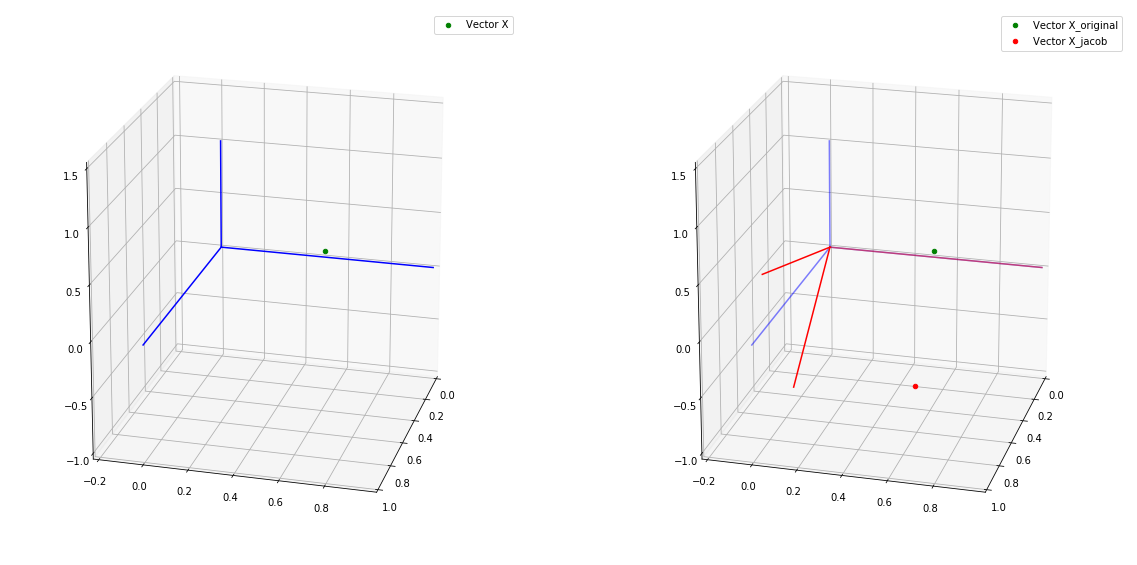

In [10]:
# 표준 기저에서의 3D형태

plt.figure(figsize = (20,10))
fig_1 = plt.subplot(1,2,1,projection="3d",xlim=(0,1),ylim=(-0.2,1),zlim=(-1,1.5))
fig_2 = plt.subplot(1,2,2,projection="3d",xlim=(0,1),ylim=(-0.2,1),zlim=(-1,1.5))

first = np.linspace(0,1,1000)
second = np.linspace(0,0,1000)
third = np.linspace(0,0,1000)

fig_1.plot3D(first,second,third,c="b")
fig_1.plot3D(second,first,third,c="b")
fig_1.plot3D(third,second,first,c="b")

fig_1.scatter3D(X[0],X[1],X[2],marker="o",c="g",label = "Vector X")

fig_2.plot3D(first,second,third,c="b",alpha=0.5)
fig_2.plot3D(second,first,third,c="b",alpha=0.5)
fig_2.plot3D(third,second,first,c="b",alpha=0.5)

x = np.linspace(0,RI[0,0],1000)
x_y = np.linspace(0,RI[0,1],1000)
x_z = np.linspace(0,RI[0,2],1000)

y_x = np.linspace(0,RI[1,0],1000)
y = np.linspace(0,RI[1,1],1000)
y_z = np.linspace(0,RI[1,2],1000)

z_x = np.linspace(0,RI[2,0],1000)
z_y = np.linspace(0,RI[2,1],1000)
z = np.linspace(0,RI[2,2],1000)

fig_2.plot3D(x,x_y,x_z,c="r")
fig_2.plot3D(y_x,y,y_z,c="r",alpha=0.5)
fig_2.plot3D(z_x,z_y,z,c="r")

fig_2.scatter3D(X[0],X[1],X[2],marker="o",c="g",label = "Vector X_original")
fig_2.scatter3D(Rx[0,0],Rx[0,1],Rx[0,2],marker="o",c="r",label = "Vector X_jacob")

fig_1.legend()
fig_1.view_init(20,15)
fig_2.legend()
fig_2.view_init(20,15)

plt.show()

야코비 변환행렬로 기저변환된 우측 공간을 확인해보면, 벡터 X = (0.7,0.7,0.7)이 변환된 기저에 따라 X = (0.956, 0.7, -0.256)로 변환됬음을 볼 수 있다.

그러나, Y축은 X,Z와는 달리 변환이 되지 않은것을 확인할 수 있다.

이는, 야코비 변환행렬이 Y축 성분에 해당하는 2열이 [0,1,0]으로 변환하지 않았기 때문이다.

### (3) 야코비 회전법 알고리즘

In [355]:
#실대칭행렬

K = np.matrix([[7,1,2],[1,2,1],[2,1,7]])
print(K)
print(K.T) #를 정의하자

[[7 1 2]
 [1 2 1]
 [2 1 7]]
[[7 1 2]
 [1 2 1]
 [2 1 7]]


In [332]:
# 가장 값이 큰 비대각 요소값(no 대각요소값!) 을 찾는다.


## 대각 요소를 0으로 만든다.(비대각 요소만 추출하기 위함이다)
K_n_diag = K - np.identity(3) * np.diag(K)

## 비대각 요소중 가장 큰 값을 찾아 그 행과 열의 값을 참조한다.
row_max = np.where(K_n_diag == np.argmax(K_n_diag))[0][0]
col_max = np.where(K_n_diag == np.argmax(K_n_diag))[0][1]

print(K[row_max,col_max])

2


In [333]:
## 비대각 요소중 가장 큰 값을, 대각성분의 합으로 나눈 값의 역탄젠트값을 각 K로 활용한다.

k = (1/2) * np.arctan((2*K[col_max,row_max])/(K[col_max,col_max] + K[row_max,row_max]))

In [334]:
#row_max를 p로, col_max를 q로 놓는다.

a = np.min([row_max,col_max])
b = np.max([row_max,col_max])

jacob = np.identity(3)
jacob[a,a] = np.cos(k)
jacob[b,a] = np.sin(k)
jacob[b,b] = np.cos(k)
jacob[a,b] = -np.sin(k)

print(jacob)

[[ 0.99033427  0.         -0.13870121]
 [ 0.          1.          0.        ]
 [ 0.13870121  0.          0.99033427]]


In [335]:
#(p행 q열), 혹은 (p열 q행) 혹은 (p행 p열), (q행 q열)의 값만 영향을 받는 것을 확인할 수 있다.

np.matmul(jacob.T,K)

matrix([[7.20974234, 1.12903549, 2.95157703],
        [1.        , 2.        , 1.        ],
        [1.00976006, 0.85163306, 6.65493749]])

In [353]:
# 반복 알고리즘


shape = K.shape[0]

for i in range(0,10000):
    ## 대각 요소를 0으로 만든다.
    K_n_diag = K - np.identity(shape) * np.diag(K)

    ## 비대각 요소중 가장 큰 값을 찾아 그 행과 열의 값을 참조한다.
    row_max = np.where(K_n_diag == np.max(K_n_diag))[0][0]
    col_max = np.where(K_n_diag == np.max(K_n_diag))[1][0]

    ## 각도를 갱신하는 부분

    k = (1/2) * np.arctan((2*K[col_max,row_max])/(K[col_max,col_max] + K[row_max,row_max]))

    a = np.min([row_max,col_max])
    b = np.max([row_max,col_max])

    ## 야코비 회전행렬을 만든다.

    jacob = np.matrix(np.identity(shape))
    jacob[a,a] = np.cos(k)
    jacob[b,a] = np.sin(k)
    jacob[b,b] = np.cos(k)
    jacob[a,b] = -np.sin(k)


    temp = np.matmul(jacob.T,K)
    K = np.matmul(temp,jacob)

K.round()

matrix([[ 9.,  0., -0.],
        [ 0.,  5.,  0.],
        [-0.,  0.,  2.]])

## 2) QR법

### (1) 개요
#### - 개요 그람 슈미트 정규직교기저를 열벡터로 가지는 행렬 Q와
#### - 정규직교기저화를 실시하면서 나타나는 pn = (1/rnn)qn - (rkj)qn-1 - ... 의 계수 (rnn, rkj)를 모은 상삼각행렬 R로 분해하는 방법을 QR분해라고 한다.

### (2) 그람-슈미트 정규 직교화

#### - 순서는 다음과 같다.

- q1 = p1/|p1|, 단 p1 = a1 
- q2 = p2/|p2|, 단 p2 = a2 - (a2 * q1) * q1
- q3 = p3/|p3|, 단 p3 = a3 - (a3 * q1) * q1 - (a3 * q2) * q2
- ...
- 즉, 각 기저를 각 직교기저에 정사영 후 빼줌으로서 각 기저별로 조금씩 정규직교기저로 만들어가는 과정이다.

#### - 위 순서에서, 이를 a1,a2,...an의 식으로 다시 바꾸면

- a1 = |p1| * q1
- a2 = |p2| * q2 + (a2 * q1) * q1
- a3 = |p3| * q3 + (a3 * q1) * q1 + (a3 * q2) * q2
- ....

#### - 이를 행렬 형식으로 표현하면
- A = QR이라고 가정할 때
- Q 행렬은 q1,q2,q3....를 열벡터로 취한다. -> [q1, q2, q3, ..... qn](단, q1...qn은 정규직교기저)
- R행렬은 q1,q2,q3의 계수가 들어가는 상삼각행렬이 된다.
- (단, rnn = |qn|, rkj = (aj * qk) 이다. 즉 대각성분은 각 정규직교기저의 norm이고, 비대각성분은 원 기저와 정규직교기저의 내적이다.)

In [362]:
print(np.matrix([["r11","r12","...","r1n-1","r1n"],[0,"r22","r23","...","r2n"],[0,0,"r33","...","r3n"]]))

[['r11' 'r12' '...' 'r1n-1' 'r1n']
 ['0' 'r22' 'r23' '...' 'r2n']
 ['0' '0' 'r33' '...' 'r3n']]


- 한편, Q는 정규직교기저이므로, Q^T = Q^-1이다. 즉, A * Q^T = R을 구할 수 있다.
- 하지만, 정규직교화 하는 과정에서 오차가 누적되므로 이 직접적인 방법은 쓰이지 않는다.

### (3) 거듭제곱법과 고유벡터로의 수렴

#### - x1...xn을 고윳값 ㅅ1.....ㅅn에 대응하는 고유벡터라고 하자. 이때, 고윳값 ㅅ1...ㅅn은 절댓값으로 크기를 정렬한다. |ㅅ1| > |ㅅ2| >...|ㅅn|
#### - 이 때, v1..vn을 어떤 선형독립인 초깃값 벡터라고 할 때
- v1을 고유벡터들의 선형결합으로 표현할 수 있다 : v1 = (v11)x1 + (v12)x2 + ...
- vn을 고유벡터들의 선형결합으로 표현할 수 있다 : v2 = (v21)x1 + (v22)x2 + ...

- 이 때, 각 선형독립벡터 vn에 행렬A를 k번 거듭제곱하고 내적할 경우, A의 고윳값 ㅅ1...ㅅn에 대하여


- A^(k) * v1 = (v11) * ㅅ1^(k) * x1 + (v12) * ㅅ2^(k) * x2 + ...
- A^(k) * v2 = (v21) * ㅅ2^(k) * x1 + (v22) * ㅅ2^(k) * x2 + ...


- 즉, 우변엔 고윳값의 k거듭제곱만큼 각 고유기저에 곱해지게 된다.

#### - 각 선형결합에서 고유값 ㅅ1을 나누면

- A^(k) * v1 // (v11) * x1 + (v12) * (ㅅ2/ㅅ1)^k * x2 + (v13) * (ㅅ3/ㅅ1)^k * x3 + ...

이 때, k -> infinity로 보내면, ㅅ1...ㅅn은 절댓값 크기대로 정렬한 값이므로 각 항의 (ㅅn/ㅅ1)은 1보다 작다. v(11) * x1을 제외한 나머지 항들은 0으로 수렴한다.

- 따라서, A^(k) * v1은 결국엔 고유벡터인 x1으로 수렴하며, A^(k) * v2 , ... , A^(k) * Vn 모두 x1으로 수렴한다.
- 따라서, A^(k) * Vn을 정규직교화한 

q1(k) = p1/|p1|, p1 = A^(k) * v1

q2(k) = p2/|p2|, p2 = A^(k) * v2 - (A^(k) * v2 * q1(k) ) * q1(k)

...

- 에서, q1(k)는 span(x1)으로 수렴한다.
- q2(k) ... qn(k)는 A^(k)Vn 만 보자면 궁극적으로 모두 x1으로 수렴하므로, 이들의 뺄셈은 결국 영벡터로 수렴하도록 만드는것이 아닌가 생각할수도 있지만, 
- 그 좌표값 Vnn들이 전부 다르기때문에 궁극적으로 하나로 수렴하진 않는다. 


- 따라서, 정규직교기저 q1(k)와 q2(k), ... , qn(k)가 만드는 부분공간은

span(q1(k), q2(k) , ... , qn(k)) -> span(x1,x2, ... , xn) 으로 수렴한다.

### (4) QR법

#### - 순서

- 행렬을 QR로 분해한다.
- 분해한 QR을 역순인 RQ로 곱한다.
- 도출된 A(i+1) = RQ를 다시 분해한다.
- 2부터 반복한다.

#### - 이를 통해 궁극적으로 행렬은 상삼각행렬로 수렴하는데, 이 때 상삼각행렬의 대각성분은 고윳값이므로, 이 값이 바로 행렬의 고윳값이 된다.

#### - 헤센버그 행렬

- 헤센버그 행렬 : 대각성분에서 하나 아래인 부대각성분이 0이 아닌, 유사대각행렬

In [368]:
print(np.matrix([["*","*","*","*","*"],[0,"*","*","*","*"],[0,0,"*","*","*"],[0,0,0,"*","*"]]))

[['*' '*' '*' '*' '*']
 ['0' '*' '*' '*' '*']
 ['0' '0' '*' '*' '*']
 ['0' '0' '0' '*' '*']]


- 헤센버그 행렬을 QR분해하면 다음과 같은 모양이 나온다.

In [385]:
print(np.matrix([["*","*","*","*","*"],["*","*","*","*","*"],[0,"*","*","*","*"],[0,0,"*","*","*"],[0,0,0,"*","*"]]))
print("=")
print("Q")
print(np.matrix([["&","&","&","&","&"],["&","&","&","&","&"],[0,"&","&","&","&"],[0,0,"&","&","&"],[0,0,0,"&","&"]]))
print("*")
print("R")
print(np.matrix([["^","^","^","^","^"],[0,"^","^","^","^"],[0,0,"^","^","^"],[0,0,0,"^","^"],[0,0,0,0,"^"]]))

[['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['0' '*' '*' '*' '*']
 ['0' '0' '*' '*' '*']
 ['0' '0' '0' '*' '*']]
=
Q
[['&' '&' '&' '&' '&']
 ['&' '&' '&' '&' '&']
 ['0' '&' '&' '&' '&']
 ['0' '0' '&' '&' '&']
 ['0' '0' '0' '&' '&']]
*
R
[['^' '^' '^' '^' '^']
 ['0' '^' '^' '^' '^']
 ['0' '0' '^' '^' '^']
 ['0' '0' '0' '^' '^']
 ['0' '0' '0' '0' '^']]


즉, 원 행렬과 같은 헤센버그 행렬꼴의 정규직교행렬 Q와, 상삼각행렬인 R로 분해된다.

- 분해한 QR을 역순해서 다시 곱하면

In [387]:
print("R")
print(np.matrix([["^","^","^","^","^"],[0,"^","^","^","^"],[0,0,"^","^","^"],[0,0,0,"^","^"],[0,0,0,0,"^"]]))
print("*")
print("Q")
print(np.matrix([["&","&","&","&","&"],["&","&","&","&","&"],[0,"&","&","&","&"],[0,0,"&","&","&"],[0,0,0,"&","&"]]))
print("=")
print(np.matrix([["*","*","*","*","*"],["*","*","*","*","*"],[0,"*","*","*","*"],[0,0,"*","*","*"],[0,0,0,"*","*"]]))

R
[['^' '^' '^' '^' '^']
 ['0' '^' '^' '^' '^']
 ['0' '0' '^' '^' '^']
 ['0' '0' '0' '^' '^']
 ['0' '0' '0' '0' '^']]
*
Q
[['&' '&' '&' '&' '&']
 ['&' '&' '&' '&' '&']
 ['0' '&' '&' '&' '&']
 ['0' '0' '&' '&' '&']
 ['0' '0' '0' '&' '&']]
=
[['*' '*' '*' '*' '*']
 ['*' '*' '*' '*' '*']
 ['0' '*' '*' '*' '*']
 ['0' '0' '*' '*' '*']
 ['0' '0' '0' '*' '*']]


- 다시 헤센버그 행렬꼴로 바뀌며, 다음 iter에서 헤센버그행렬꼴인 이 A(i+1)을 다시 QR분해 하는데 써먹을 수 있다.
- 헤센버그 행렬꼴을 활용하면, 아래에 0으로 바뀌는 데이터 만큼은 계산을 아낄 수 있다.

#### - 하우스홀더법

- 행렬을 헤센버그행렬꼴로 변환하는 알고리즘이다.

In [244]:
A = np.array([[2,1,0,1],[4,3,1,2],[1,0,3,1],[4,2,5,2]])
print(A)

[[2 1 0 1]
 [4 3 1 2]
 [1 0 3 1]
 [4 2 5 2]]


In [245]:
#하우스홀더법

def householder(A):
    col,row = A.shape
    for i,j in zip(range(0,col),range(1,row)):

        #부대각성분 밑의 성분들만 0으로 만들기 위해, [3:4,col] 벡터가 생성되면, 즉 scalar 벡터가 생성되면 중단한다.
        if j  == row - 1:
            break

        #하우스홀더 행렬을 위한 단위벡터 u 생성부분
        u = A[j:row,i]
        temp_array = np.zeros(row - j)
        temp_array[0] = np.linalg.norm(u)
        u = u - temp_array
        u = u/np.linalg.norm(u)

        # 위에서 생성한 단위벡터 u를 이용하여 하우스홀더 행렬 생성
        h = np.identity(row - j) - 2 * np.outer(u,u.T)
        h = np.block([[np.identity(j),np.zeros((j,row-j))],[np.zeros((row-j,j)),h]])

        #하우스홀더 행렬로 A를 닮음변환한다.

        temp = np.matmul(h,A)
        A = np.matmul(temp,h)
    return A

In [3]:


def QR_decomposition(K,iteration = 10000):
   
    shape = K.shape[0]

    for i in range(0,iteration):

        #1열부터 n열까지 한 iteration에서 변환을 누적적으로 시행하는게 핵심이다.
        for j in range(0,shape-1):
            ## 각도를 갱신하는 부분. k가 이렇게 된 이유는 아래에 후술한다.
            k = np.arctan(K[j+1,j]/K[j,j])


            ## 야코비 회전행렬을 만든다.
            jacob = np.matrix(np.identity(shape))
            jacob[j,j] = np.cos(k)
            jacob[j+1,j] = np.sin(k)
            jacob[j+1,j+1] = np.cos(k)
            jacob[j,j+1] = -np.sin(k)

            ## 좌측에 jacob 회전행렬의 전치를, 우측에 jacob 회전행렬 원본을 행렬곱한다. 
            R = np.matmul(jacob.T,K)
            K = np.matmul(R,jacob)
    
    Q = jacob
    return (Q,R,R.diagonal())

In [246]:
K = householder(A)

Q,R,diag = QR_decomposition(K)

print("Q행렬")
print(Q.round(3))
print("R행렬")
print(R.round(3))
print("고윳값")
print(diag)

Q행렬
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1. -0.]
 [ 0.  0.  0.  1.]]
R행렬
[[ 7.096  0.597  4.634  3.077]
 [ 0.     3.027  2.092 -0.525]
 [-0.     0.    -0.548  0.223]
 [-0.    -0.     0.     0.425]]
고윳값
[[ 7.09635433  3.02671935 -0.54792746  0.42485379]]


#### - k가 해당 식처럼 정의된 이유

- QR분해 알고리즘의 목적은 정규직교기저인 야코비 회전행렬(Q)를 A에 지속적으로 누적시켜서, 그 때 도출되는 R행렬을 상삼각행렬에 수렴시키는것이다.


- 그러기 위해선 대각성분 밑의 하삼각형을 0으로 만들 필요가 있고, 
- 앞서 헤센버그 행렬을 만들 때 이미 부대각성분 밑의 (n-1) 크기만큼의 하삼각형은 0으로 만들었기 때문에 이제 목적은 부대각성분을 0으로 만드는 것이다.

- 야코비 회전행렬 R(1,2), R(2,3), R(3,4)를 정의하고, 이를 순차적으로 누적시키면 각각 A행렬의 (2,1), (3,2), (4,3)이 영향을 받는다. 즉, 부대각성분이 영향을 받는다.

In [1393]:
A = np.array([[2,1,0,1],[4,3,1,2],[1,0,3,1],[4,2,5,1]])

K = householder(A)

In [1394]:
print(K.round(3))

[[ 2.     1.393 -0.152 -0.194]
 [ 5.745  4.818  3.096  2.556]
 [-0.     0.625 -1.029 -0.444]
 [ 0.     0.     1.645  3.211]]


In [1397]:
shape = K.shape[0]

j = 0
## 각도를 갱신하는 부분. k가 이렇게 된 이유는 아래에 후술한다.
k = np.arctan(K[j+1,j]/K[j,j])


## 야코비 회전행렬을 만든다.
jacob = np.matrix(np.identity(shape))
jacob[j,j] = np.cos(k)
jacob[j+1,j] = np.sin(k)
jacob[j+1,j+1] = np.cos(k)
jacob[j,j+1] = -np.sin(k)

## 좌측에 jacob 회전행렬의 전치를, 우측에 jacob 회전행렬 원본을 행렬곱한다. 
R = np.matmul(jacob.T,K)
K = np.matmul(R,jacob)

In [1398]:
R.round(3)

array([[ 6.083,  5.008,  2.874,  2.35 ],
       [ 0.   ,  0.269,  1.161,  1.023],
       [-0.   ,  0.625, -1.029, -0.444],
       [ 0.   ,  0.   ,  1.645,  3.211]])

위 예에서 연산전 K와 연산후 R을 비교하면, (2,1)성분이 0이 된 것을 확인할 수 있다. 이는

In [1399]:
jacob

matrix([[ 0.32879797, -0.94440028,  0.        ,  0.        ],
        [ 0.94440028,  0.32879797,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])

인 야코비 회전행렬에서, 

In [1402]:
print(np.matrix([["cos(k)","-sin(k)",0],["sin(k)","cos(k)",0],[0,0,1]]).T)

[['cos(k)' 'sin(k)' '0']
 ['-sin(k)' 'cos(k)' '0']
 ['0' '0' '1']]


이기 때문에, (1,2) 성분에 영향을 주는 -(1,1성분) * sin(k) + (1,2성분) * cos(k) = 0이어야 하기 때문이다.

- 이항하면 (1,2성분) cos(k) = (1,1성분) * sin(k)이고, 이는


- {(1,2성분)/(1,1성분)} * tan(k) = 1 로 정리된다. 역삼각함수로 정의하면


- k = arctan((1,1성분)/(1,2성분))이다. 

### (4) 고유벡터 구하기

#### - 앞서 구한 고윳값을 이용하여 이번엔 고유벡터를 수렴시키는 알고리즘을 활용한다.(이를 역반복법이라고 한다)
#### - 핵심은 어떤 초기벡터 v에 대하여
- (A - ㅅI)^k * v -> span(x) (단, x는 고윳값 ㅅ에 대한 고유벡터) 를 이용하는 것이다.
- 즉, k가 커지면 커질수록 v는 점점 고유벡터 x로 수렴한다.

#### - 이 때, 최대 고윳값을 도출하는 (A - ㅅI)가 아닌, 최소 고윳값을 도출하는 (A - ㅅI)^(-1), 즉 특성행렬의 역행렬을 반복 곱한다.
- 이렇게 될 경우, 고윳값은 1/ㅅ가 되며, 이 값을 최대화 하는것은 반대로 ㅅ를 최소화한다는 의미가 된다.

#### - 특성행렬의 역행렬을 직접 구하는것은 피하고, 이를 LU 분해하여
- LUx = v에서 Lz = v, Ux = z를 구하는 방식으로 x = (LU)^(-1) * v를 구한다.

In [127]:
def pivoting(pivot_table,where,ind):
    temp = pivot_table[where].copy()
    pivot_table[where] = pivot_table[ind].copy()
    pivot_table[ind] = temp.copy()
    return pivot_table

def making_pivot(x):
    rows = np.shape(x)[0]
    pivot_table = np.diag([1 for i in range(0,rows)])
    return pivot_table

def LUdecomp_pivot(x) :
    if type(x) != type(np.matrix([0])):
        raise ValueError 
    
    #행렬의 행과 열 차원중 작은쪽을 s로 지정해준다.
    s = np.min(x.shape)
    
    # X의 전치행렬에서 0이 아닌 가장 가까운 행을 np.where로 찾는다.
    ind = np.where(x.T[0] != 0)[1][0]
    # 행의 순서 교환을 기록한 pivot_table을 생성한다.
    pivot_table = pivoting(making_pivot(x),0,ind)
    x = np.matmul(pivot_table,x)
    pivot_table_summary = pivot_table.copy()
    
    normalizer = 1/(x[0,0])
    l = normalizer * x[0].T
    u = x.T[0]
    temp = np.matmul(l,u).T
    x = np.matrix(x - temp)
    
    for i in range(1,s):
        # X의 전치행렬에서 0이 아닌 가장 가까운 행을 np.where로 찾는다.
        ind = np.where(x.T[i] != 0)[1][0]
        # 행의 순서 교환을 기록한 pivot_table을 생성한다.
        pivot_table = pivoting(making_pivot(x),i,ind)
        x = np.matmul(pivot_table,x)
        pivot_table_summary = np.matmul(pivot_table_summary,pivot_table)
        
        normalizer = 1/x[i,i]
        temp_l = normalizer * x[i].T
        temp_u = x.T[i]
        l = np.hstack([l,temp_l])
        u = np.vstack([u,temp_u])
        temp = np.matmul(temp_l,temp_u).T
        x = np.matrix(x - temp)
    return (l,u,pivot_table_summary)

def sol_U(U,y,pivot,debug):
    # U를 전치해준다.
    U = U.T
    # 정답벡터 y에, pivot을 우변으로 이항하여(즉, 역행렬로 만들어) y에 행렬곱해준다.
    y_pivot = np.matmul(np.linalg.inv(pivot),y)
    # 행렬의 모양을 가져온다.
    shape = U.shape[0]
    # 차원 만큼 0로 차있는, 임시 벡터 0를 만들어준다.
    z = np.zeros(shape)
    # 초깃값 z[0]는 정답벡터 y'를 상삼각행렬의 첫번째 대각성분으로 나눠준 값으로 한다.
    z[0] = y_pivot[0]/U[0,0]

    if debug:
        print(z)

    for i in range(1,shape):
        # 여기가 핵심이다.
        # 노리는 효과는, z는 기본적으로 i-1번째 요소까지만 값이 저장되어있고, 나머지는 0인 상태를 이용하는 것이다.
        # 상삼각행렬 U의 i번째 행과 i-1번째 요소까지만 값이 저장되어있는 z를 행렬곱하면, 구하고자 하는 성분인 i번째 열에 속하는 
        # 변수 z[i]는 0으로 처리되어 계산에 전혀 영향을 주지 않는다.(디버그 모드를 키면 무슨 말인지 이해할 수 있다)
        # z[i]에 속하는 대각성분인 U[i,i]를 계산한 값에 나누기 해주면, z[i]를 구할 수 있다.
        z[i] = (y_pivot[i] - np.matmul(U[i],z))/U[i,i]
        if debug:
            print(z)
    if debug:
        print("상삼각행렬 연산 종료")
    return z

def sol_L(L,z,debug):
    L = L.T
    shape = L.shape[0] - 1
    x = np.zeros(shape + 1)
    x[shape] = z[shape]/L[shape,shape]
    if debug:
        print(x)
    for i in reversed(range(0,shape)):
        x[i] = z[i] - np.matmul(L[i],x)/L[i,i]
        if debug:
            print(x)
    if debug:
        print("하삼각행렬 연산 종료")
    return x

def solving_pivot(L,U,pivot,y,debug = False):
    z = sol_U(U,y,pivot,debug)
    x = sol_L(L,z,debug)
    return b

In [273]:
# 구해준 고윳값과 원행렬을 이용하여 이번엔 고유벡터를 구한다.

def eigen_vector(A,eig_value):
    
    shape = np.shape(A)[0]
    
    #초기 재료벡터로 단위행렬의 열벡터를 사용할 것이다.
    init = np.identity(shape)

    for j in range(0,shape):
        
        # (A - ㅅI), 즉 특성행렬을 이용할것이다.
        A_eI = np.matrix(A - diag[0,j] * np.identity(shape))
        L,U,pivot = LUdecomp_pivot(A_eI)   
        for k in range(0,1000):
            # LU분해를 활용하여 역행렬을 곱한 벡터를 도출해준다.
            temp = solving_pivot(L,U,pivot,init[j])
            # 역행렬을 곱해 도출된 임시 고유벡터가 지나치게 커지지 않도록, norm으로 단위벡터로 만들어준다.
            temp = temp/np.linalg.norm(temp)
            # iter를 종료하고, 해당 값을 저장한 후, 그 값을 다음 iter에서 다시 활용하여 반복한다.
            init[j] = temp.copy()
    return init.T

In [275]:
eig_vector = eigen_vector(A,diag)

In [276]:
print(diag)
print(eig_vector)

[[ 7.09635433  3.02671935 -0.54792746  0.42485379]]
[[ 0.26011341 -0.31914014  0.31817497  0.63282945]
 [ 0.64329968 -0.66254778  0.11468953 -0.70480318]
 [ 0.23006893  0.58909686  0.17114253 -0.13235509]
 [ 0.68233043  0.33488042 -0.92537627 -0.29199573]]


In [277]:
np.linalg.eig(A)

(array([ 7.09635433,  3.02671935,  0.42485379, -0.54792746]),
 array([[-0.26011341, -0.31914014,  0.63282945, -0.31817497],
        [-0.64329968, -0.66254778, -0.70480318, -0.11468953],
        [-0.23006893,  0.58909686, -0.13235509, -0.17114253],
        [-0.68233043,  0.33488042, -0.29199573,  0.92537627]]))